In [31]:
import numpy as np # 数据处理最重要的模块
import pandas as pd # 数据处理最重要的模块
import scipy.stats as stats # 统计模块
import scipy
# import pymysql  # 导入数据库模块

from datetime import datetime # 时间模块
import statsmodels.formula.api as smf  # OLS regression

# import pyreadr # read RDS file

from matplotlib import style
import matplotlib.pyplot as plt  # 画图模块
import matplotlib.dates as mdates

from matplotlib.font_manager import FontProperties # 作图中文
from pylab import mpl
#mpl.rcParams['font.sans-serif'] = ['SimHei']
#plt.rcParams['font.family'] = 'Times New Roman'

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from IPython.core.interactiveshell import InteractiveShell # jupyter运行输出的模块
#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns', None)

In [32]:
US_market_ret = pd.read_csv("D:/python data/US stock market return.csv")
US_market_ret['month'] = pd.to_datetime(US_market_ret['month'],format='%Y/%m/%d')
US_market_ret.set_index('month',inplace=True)
US_market_ret.sort_index(inplace=True)
US_market_ret

,r
month,
1926-01-01,0.000561
1926-02-01,-0.033046
1926-03-01,-0.064002
1926-04-01,0.037029
1926-05-01,0.012095
...,...
2023-08-01,-0.020300
2023-09-01,-0.048003
2023-10-01,-0.029225


In [33]:
inflation=pd.read_csv("D:/python data/CPALTT01USM657N.csv")
inflation['month']=pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation.sort_values(by=['month'],axis=0,ascending=True)

,cpi
month,
1955-02-01,0.000000
1955-03-01,0.000000
1955-04-01,0.000000
1955-05-01,0.000000
1955-06-01,0.000000
...,...
2010-08-01,0.138066
2010-09-01,0.058174
2010-10-01,0.124520


# cpi作图

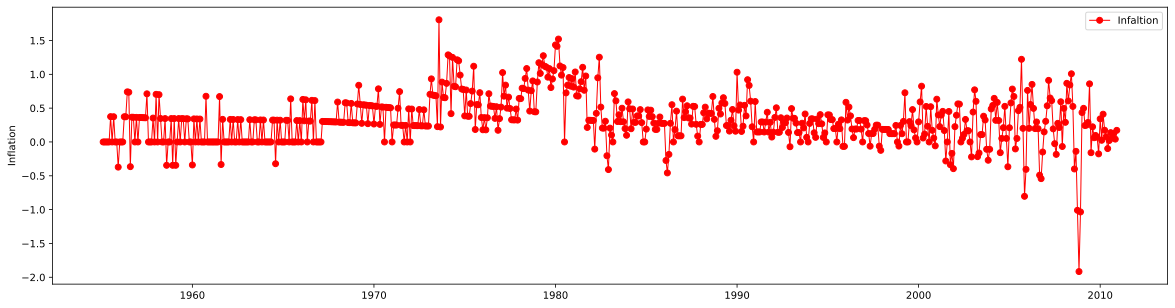

In [34]:
fig, ax=plt.subplots(figsize=(20,5))
ax.plot(inflation['cpi'],label='Infaltion',color='red',linewidth=1,linestyle='-',marker='o')
ax.set_ylabel('Inflation')
ax.legend(loc='upper right')
plt.show();

#1970年前数据偏差过大

# 截取1970年之后的数据

In [35]:
reg_data=pd.merge(US_market_ret['1970':'2023'],inflation['1970':'2023'],left_index=True,right_index=True)

reg_data

,r,cpi
month,,
1970-01-01,-0.073254,0.265252
1970-02-01,0.056706,0.529101
1970-03-01,-0.004729,0.526316
1970-04-01,-0.105318,0.785340
1970-05-01,-0.064346,0.259740
...,...,...
2010-08-01,-0.043909,0.138066
2010-09-01,0.092625,0.058174
2010-10-01,0.039020,0.124520


In [36]:
if not isinstance(reg_data.index,pd.DatetimeIndex):
    reg_data.index = pd.to_datetime(reg_data.index)
reg_data = reg_data.resample('ME').last()

reg_data

,r,cpi
month,,
1970-01-31,-0.073254,0.265252
1970-02-28,0.056706,0.529101
1970-03-31,-0.004729,0.526316
1970-04-30,-0.105318,0.785340
1970-05-31,-0.064346,0.259740
...,...,...
2010-08-31,-0.043909,0.138066
2010-09-30,0.092625,0.058174
2010-10-31,0.039020,0.124520


# cpi和inflation一起作图

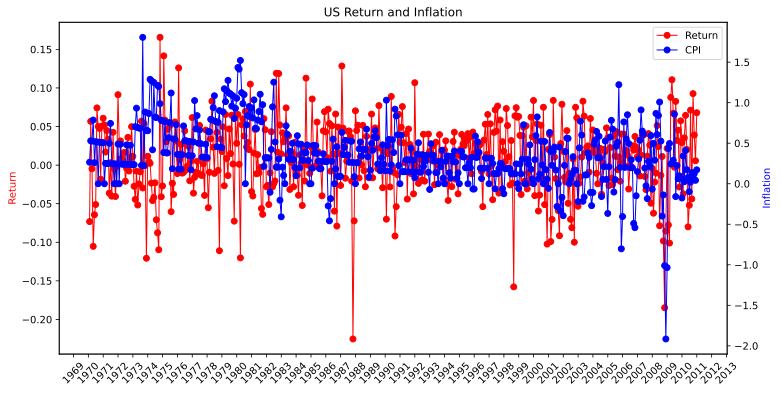

In [37]:
fig, ax1=plt.subplots(figsize=(12,6))

ax1.plot(reg_data["r"],
         label='Return',
         color='red',
         linewidth=1,
         linestyle='-',
         marker='o')
ax1.set_ylabel('Return', color='red')

data_format=mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)

ax2=ax1.twinx()
ax2.plot(reg_data["cpi"],
         label='CPI',
         color='blue',
         linewidth=1,
         linestyle='-',
         marker='o')
ax2.set_ylabel('Inflation', color='blue')

plt.title("US Return and Inflation")

lines, labels=ax1.get_legend_handles_labels()
lines2, labels2=ax2.get_legend_handles_labels()
ax2.legend(lines+lines2, labels+labels2,loc='upper right')

plt.show();

# 通货膨胀与股票预期收益率


# 经济学假设

$$
R_t = \alpha + \beta * CPI_{t-1} + \epsilon_t
$$

# 描述性统计

In [38]:
reg_data['cpi'].describe().round(3)
reg_data=reg_data['1970':]
reg_data

count    492.000
mean       0.359
std        0.374
min       -1.915
25%        0.154
50%        0.316
75%        0.532
max        1.806
Name: cpi, dtype: float64

,r,cpi
month,,
1970-01-31,-0.073254,0.265252
1970-02-28,0.056706,0.529101
1970-03-31,-0.004729,0.526316
1970-04-30,-0.105318,0.785340
1970-05-31,-0.064346,0.259740
...,...,...
2010-08-31,-0.043909,0.138066
2010-09-30,0.092625,0.058174
2010-10-31,0.039020,0.124520


In [39]:
reg_data.skew().round(3)
reg_data.kurt().round(3)

r     -0.569
cpi   -0.145
dtype: float64

r      1.950
cpi    3.667
dtype: float64

# OLS回归

In [40]:
reg_data['lcpi']=reg_data['cpi'].shift(2)/100
model_cpi=smf.ols('r~lcpi',data=reg_data).fit()
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6178
Date:                Tue, 31 Dec 2024   Prob (F-statistic):              0.432
Time:                        15:52:33   Log-Likelihood:                 805.86
No. Observations:                 490   AIC:                            -1608.
Df Residuals:                     488   BIC:                            -1599.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0076      0.003      2.573      0.0

C:\Users\lockon\AppData\Local\Temp\ipykernel_92936\627816382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data['lcpi']=reg_data['cpi'].shift(2)/100


# 季度结果

In [41]:
Q_reg_data=reg_data.resample('QE').apply({
    'r':lambda x:(1+x).prod()-1,
    'cpi':lambda x: sum(x)
})
Q_reg_data

,r,cpi
month,,
1970-03-31,-0.025333,1.320668
1970-06-30,-0.205636,1.563215
1970-09-30,0.181533,1.028284
1970-12-31,0.093946,1.522869
1971-03-31,0.117728,0.501883
...,...,...
2009-12-31,0.057254,-0.009034
2010-03-31,0.061101,0.777296
2010-06-30,-0.110237,0.153582


In [42]:
Q_reg_data['lcpi']=Q_reg_data['cpi'].shift(2)/100
model_cpi_q=smf.ols('r~lcpi',data=Q_reg_data).fit()
print(model_cpi_q.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6214
Date:                Tue, 31 Dec 2024   Prob (F-statistic):              0.432
Time:                        15:53:32   Log-Likelihood:                 162.01
No. Observations:                 162   AIC:                            -320.0
Df Residuals:                     160   BIC:                            -313.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0362      0.011      3.442      0.0

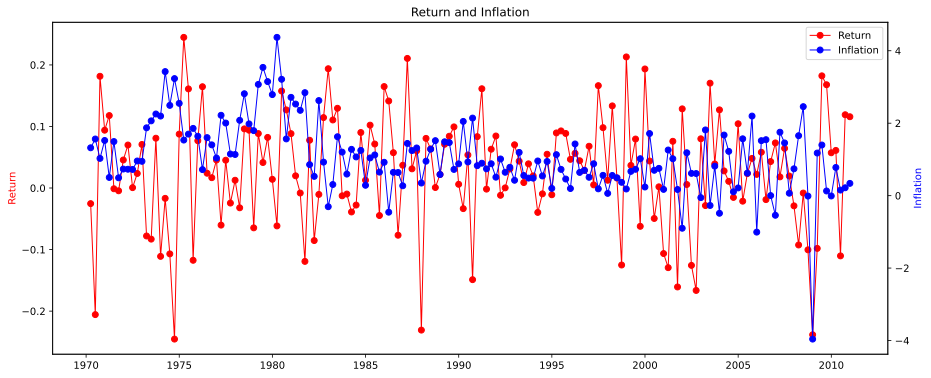

In [43]:
fig=plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(1,1,1)

ax1.plot(Q_reg_data['r'],
         label='Return',
         color='red',
         linewidth=1,
         linestyle='-',
         marker='o')
ax1.set_ylabel('Return',color='red')
ax2=ax1.twinx()
ax2.plot(Q_reg_data['cpi'],
         label='Inflation',
         color='blue',
         linewidth=1,
         linestyle='-',
         marker='o')
ax2.set_ylabel('Inflation',color='blue')
plt.title('Return and Inflation')
lines, labels=ax1.get_legend_handles_labels()
lines2, labels2=ax2.get_legend_handles_labels()
ax2.legend(lines+lines2,labels+labels2,loc='upper right')
plt.show();

# 股票市场的风险

- 方差越大，说明股票收益率的波动越大，投资者面临的不确定性越高，股票的风险也就越大。

In [44]:
market_variance = reg_data.resample('ME').apply({
    'r':
    lambda x: sum(x**2)
})
market_variance.reset_index(inplace=True)
market_variance.rename(columns={'Day':'month','r':'RV'},inplace=True)
market_variance.set_index('month',inplace=True)
market_variance

# market_variance <- daily_data[,.(MV = sum(Raw_return^2)),by = 'month'] This is R code

,RV
month,
1970-01-31,0.005366
1970-02-28,0.003216
1970-03-31,0.000022
1970-04-30,0.011092
1970-05-31,0.004140
...,...
2010-08-31,0.001928
2010-09-30,0.008579
2010-10-31,0.001523


In [45]:
reg_data=pd.merge(reg_data,market_variance,left_index=True,right_index=True)
reg_data.reset_index(inplace = True)
reg_data

,month,r,cpi,lcpi,RV
0,1970-01-31,-0.073254,0.265252,NaN,0.005366
1,1970-02-28,0.056706,0.529101,NaN,0.003216
2,1970-03-31,-0.004729,0.526316,0.002653,0.000022
3,1970-04-30,-0.105318,0.785340,0.005291,0.011092
4,1970-05-31,-0.064346,0.259740,0.005263,0.004140
...,...,...,...,...,...
487,2010-08-31,-0.043909,0.138066,-0.000976,0.001928
488,2010-09-30,0.092625,0.058174,0.000211,0.008579
489,2010-10-31,0.039020,0.124520,0.001381,0.001523
490,2010-11-30,0.005620,0.042065,0.000582,0.000032


In [46]:
reg_data['month'] = pd.to_datetime(reg_data['month'])
reg_data.set_index('month', inplace=True)

# 风险图

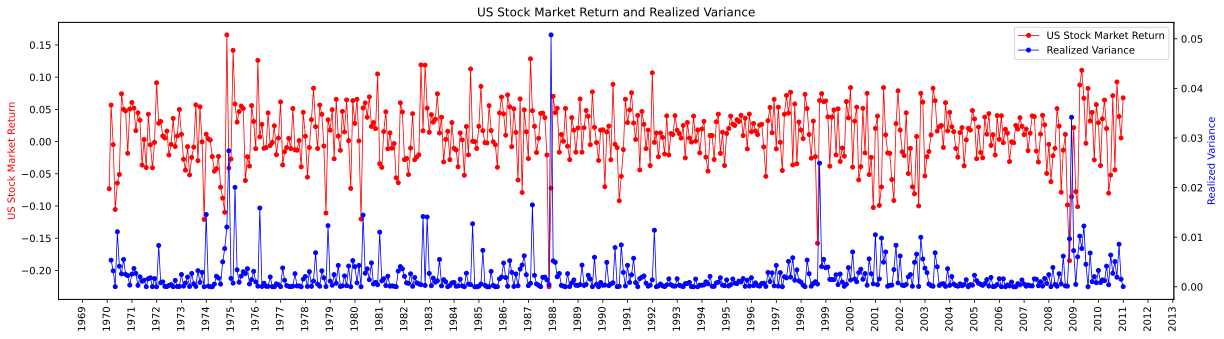

In [47]:
reg_data_plot = reg_data.copy()
# Plot the US stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(20,5))
# the linewidth and marker size are set to be very small
ax1.plot(reg_data_plot['r'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='US Stock Market Return')
ax1.set_ylabel('US Stock Market Return',color='red')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)


ax2 = ax1.twinx()
ax2.plot(reg_data_plot['RV'].shift(1),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance')

ax2.set_ylabel('Realized Variance',color='blue')

plt.title('US Stock Market Return and Realized Variance')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show();

# 描述性统计

In [48]:
reg_data['RV'].describe().round(5)

count    492.00000
mean       0.00228
std        0.00419
min        0.00000
25%        0.00022
50%        0.00087
75%        0.00264
max        0.05079
Name: RV, dtype: float64

In [49]:
reg_data['RV'].skew()
reg_data['RV'].kurt()

np.float64(5.630745616441178)

np.float64(47.984942652503506)

# ols回归

In [50]:
reg_data['lRV'] = reg_data['RV'].shift(1)
model_cpi = smf.ols('r ~ lRV',
                 data=reg_data).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3392
Date:                Tue, 31 Dec 2024   Prob (F-statistic):              0.561
Time:                        15:57:31   Log-Likelihood:                 807.44
No. Observations:                 491   AIC:                            -1611.
Df Residuals:                     489   BIC:                            -1602.
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0101      0.002      4.546      0.0

In [51]:
model_twovariables = smf.ols('r ~ lRV + lcpi',
                 data=reg_data).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_twovariables.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2967
Date:                Tue, 31 Dec 2024   Prob (F-statistic):              0.743
Time:                        15:57:42   Log-Likelihood:                 806.17
No. Observations:                 490   AIC:                            -1606.
Df Residuals:                     487   BIC:                            -1594.
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0084      0.003      2.483      0.0

# 季度结果

In [52]:
Q_reg_data = reg_data['1995-01':'2024-09'].resample('QE').apply({
    'r':
    lambda x: np.prod(1+x) - 1,
    'RV':
    lambda x: sum(x)
})
Q_reg_data

,r,RV
month,,
1995-03-31,0.089517,0.002719
1995-06-30,0.092811,0.002747
1995-09-30,0.088670,0.003073
1995-12-31,0.046609,0.002189
1996-03-31,0.056338,0.001177
...,...,...
2009-12-31,0.057254,0.004956
2010-03-31,0.061101,0.006791
2010-06-30,-0.110237,0.009525


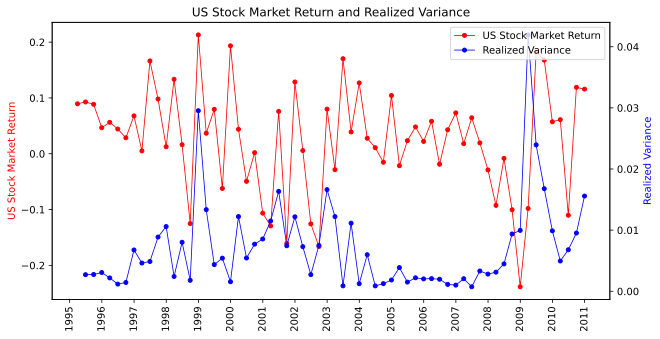

In [53]:
# Plot the US stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(10,5))
# the linewidth and marker size are set to be very small
ax1.plot(Q_reg_data['r'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='US Stock Market Return')
ax1.set_ylabel('US Stock Market Return',color='red')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(Q_reg_data['RV'].shift(1),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='Realized Variance')

ax2.set_ylabel('Realized Variance',color='blue')

plt.title('US Stock Market Return and Realized Variance')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')


plt.show();

In [54]:
Q_reg_data['lRV'] = Q_reg_data['RV'].shift(1)
model_qcpi = smf.ols('r ~ lRV',
                 data=Q_reg_data['2000-01':'2024-09']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:                      r   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                 0.0002767
Date:                Tue, 31 Dec 2024   Prob (F-statistic):              0.987
Time:                        15:58:32   Log-Likelihood:                 40.965
No. Observations:                  44   AIC:                            -77.93
Df Residuals:                      42   BIC:                            -74.36
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0091      0.018      0.498      0.6